In [14]:
## 第一部分：读取和处理数据
import pandas as pd

file_path = './NYCBike1/MoEShared/Ablation1/results.csv'
fig_title = 'Ablation Study: NYCTaxi'
data = pd.read_csv(file_path)

# 去除列名中的空格
data.columns = data.columns.str.strip()
# 将分类名提取为列表
variants = data['Category'].tolist()

In [17]:
## 第二部分：计算MAE和MAPE
# 计算加权平均
mae_list = []
mape_list = []
for index, row in data.iterrows():
    mae = row['ratio'] * row['MAE-In'] + (1 - row['ratio']) * row['MAE-Out']
    mape = row['ratio'] * row['MAPE-In'] + (1 - row['ratio']) * row['MAPE-Out']
    mae_list.append(mae)
    mape_list.append(mape)

# 现在应该不会有KeyError问题了
print(mae_list, mape_list)

[4.922, 4.926, 4.894] [22.88, 23.158, 22.885999999999996]


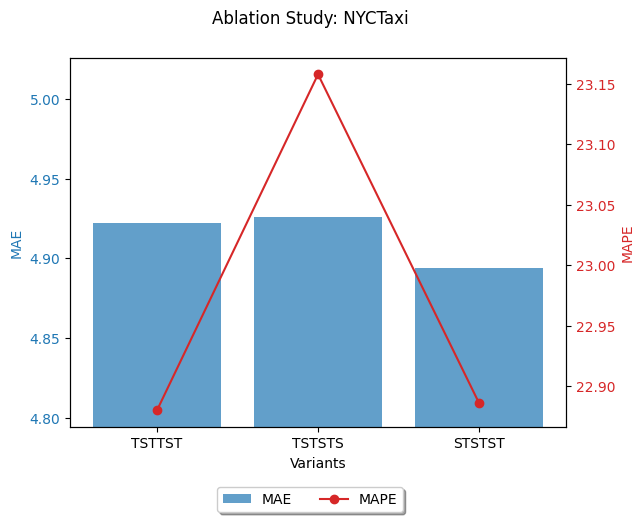

In [18]:
## 第三部分：绘图
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# 为MAE绘制条形图
color_mae = 'tab:blue'
ax1.bar(variants, mae_list, color=color_mae, alpha=0.7, label='MAE')
ax1.set_xlabel('Variants')
ax1.set_ylabel('MAE', color=color_mae)
ax1.tick_params(axis='y', labelcolor=color_mae)
ax1.set_ylim([min(mae_list) - 0.1, max(mae_list) + 0.1])

# 添加第二个y轴用于MAPE
ax2 = ax1.twinx()
color_mape = 'tab:red'
ax2.plot(variants, mape_list, color=color_mape, marker='o', linestyle='-', label='MAPE')
ax2.set_ylabel('MAPE', color=color_mape)
ax2.tick_params(axis='y', labelcolor=color_mape)

# 添加标题和图例
fig.suptitle(fig_title)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.0), shadow=True, ncol=2)

plt.show()
